# Regresion Trees with the Heart Dataset

In [1]:
import pandas as pd
import os

In [2]:
data= pd.read_csv("../datasets/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Variables:
* cp: Chest Pain Type
    * Value 1: Typical Angina
    * Value 2: Atypical Angina
    * Value 3: Non-Aginal pain
    * Value 4: Asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* Target: diagnosis of heart disease (angiographic disease status)
     * Value 0: < 50% diameter narrowing
     * Value 1: > 50% diameter narrowing

(this information is from: https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [5]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [8]:
regtree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [9]:
preds = regtree.predict(data[predictors])

In [10]:
data["preds"] = preds

In [11]:
data[["preds", "target"]]

,preds,target
0,0.521739,1
1,1.000000,1
2,1.000000,1
3,0.521739,1
4,0.500000,1
5,0.916667,1
6,0.909091,1
7,0.695652,1
8,0.695652,1
9,0.521739,1


In [26]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [29]:
data["is_train"] = np.random.uniform(0,1,len(data))<=0.70 #Vince told us Ratio Rule of Thumb 70/30, don't forget
train, test = data[data["is_train"]==True], data[data["is_train"]==False]
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=100, random_state=0)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
with open("/Users/sergio.derbez/heart.dot","w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [32]:
from graphviz import Source

In [33]:
file = open("/Users/sergio.derbez/heart.dot","r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="ca <= 0.5\\nentropy = 0.989\\nsamples = 212\\nvalue = [93, 119]"] ;\n1 [label="thal <= 2.5\\nentropy = 0.771\\nsamples = 124\\nvalue = [28, 96]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.407\\nsamples = 86\\nvalue = [7, 79]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.992\\nsamples = 38\\nvalue = [21, 17]"] ;\n1 -> 3 ;\n4 [label="entropy = 0.829\\nsamples = 88\\nvalue = [65, 23]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

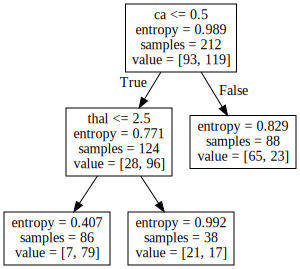

In [34]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' # This fixes the Anaconda Path
Source(text)

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [36]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree,X,Y, scoring="neg_mean_squared_error", cv= cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[-0.12066988 -0.29075762 -0.1205427  -0.21481543 -0.14500838 -0.08500293
 -0.17851715 -0.11877904 -0.07138234 -0.19096591]
-0.15364413713835065


In [37]:
regtree.feature_importances_

array([0.0405616 , 0.03892042, 0.46160756, 0.        , 0.0019159 ,
       0.        , 0.        , 0.04143727, 0.03541291, 0.01242361,
       0.        , 0.17229681, 0.19542392])

In [38]:
list(zip(predictors, regtree.feature_importances_))

[('age', 0.040561597076439235),
 ('sex', 0.03892042488865346),
 ('cp', 0.46160755905808093),
 ('trestbps', 0.0),
 ('chol', 0.0019158986395594962),
 ('fbs', 0.0),
 ('restecg', 0.0),
 ('thalach', 0.041437273966925994),
 ('exang', 0.03541291345050438),
 ('oldpeak', 0.012423607237629355),
 ('slope', 0.0),
 ('ca', 0.1722968074923846),
 ('thal', 0.1954239181898225)]

In [39]:
from sklearn.ensemble import RandomForestRegressor 

In [40]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [41]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred","target"]]

,rforest_pred,target
0,0.714286,1
1,0.434783,1
2,1.000000,1
3,0.952381,1
4,0.527778,1
5,0.853659,1
6,0.941176,1
7,0.750000,1
8,0.842105,1
9,0.833333,1


In [42]:
data["rforest_error2"] = (data["rforest_pred"]-data["target"])**2
sum(data["rforest_error2"])/len(data)

0.1390690960626421

In [43]:
forest.oob_score_

0.4392712059545406

In [44]:
forest.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
           oob_score=True, random_state=None, verbose=0, warm_start=False)>